In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym
import gym_inventory
from tqdm import tqdm

# Agent 생성

In [2]:
class Agent :
    '''CartPole 에이전트 역할을 할 클래스, 봉 달린 수레'''
    
    def __init__(self, num_states, num_actions) :
        self.brain = Brain(num_states, num_actions) # 에이전트의 행동을 결정하는 두뇌 
        
    def update_Q_function(self, observation, action, reward, observation_next)  :
        '''Q함수 수정'''
        self.brain.update_Q_table(observation, action, reward, observation_next)
        
    def get_action(self, observation, step) :
        '''행동 결정'''
        action = self.brain.decide_action(observation, step)
        return action

In [3]:
class Brain :
    '''에이전트의 두뇌 역할을 하는 클래스, Q-learning을 실제로 수행'''
    
    def __init__(self, num_states, num_actions) :
        self.num_actions = num_actions # 행동의 가짓수(왼쪽, 오른쪽)를 구함
        
        # Q-table 생성
        self.q_table = np.zeros((num_states, num_actions))
#         self.q_table = np.random.uniform(low=0, high=1, size=(num_states, num_actions))
        print(self.q_table.shape)
        
    def update_Q_table(self, observation, action, reward, observation_next) :
        '''Q-learning으로 Q-table을 수정'''
        state = observation - 1
        state_next = observation_next - 1
        Max_Q_next = max(self.q_table[state_next][:])
        
        self.q_table[state, action] = self.q_table[state, action] + \
        ETA*(reward + GAMMA*Max_Q_next - self.q_table[state, action])
        
    def decide_action(self, observation, episode) :
        '''e-greedy 알고리즘을 적용해 서서히 최적행동의 비중을 늘림'''
        state = observation - 1
        epsilon = 0.5 * (1 / (episode + 1))
        
        if epsilon <= np.random.uniform(0, 1) :
            action = np.argmax(self.q_table[state][:])
        else :
            action = np.random.choice(self.num_actions)
            
        return action

In [4]:
class Environment :
    '''Inventory Env를 실행하는 환경 역할을 하는 클래스'''
    
    def __init__(self) :
        self.env = gym.make(ENV) # 실행할 태스크를 설정
        num_states = self.env.observation_space.n
        num_actions = self.env.action_space.n
        self.agent = Agent(num_states, num_actions) # 에이전트 객체를 생성
        
    def run(self) :
        '''실행'''
        rewards_list = []
        for episode in tqdm(range(NUM_EPISODES)) : # 에피소드만큼 반복
            observation = self.env.reset() # 환경 초기화
            
            for step in range(MAX_STEPS) : # 1 에피소드에 해당하는 반복
                                
                # 행동을 선택
                action = self.agent.get_action(observation, episode)
                
                # 행동 a_t를 실행해 s_{t+1}, r_{t+1}을 계산
                observation_next, reward, done, _ = self.env.step(action) # reward, info는 사용하지 않으므로 _ 처리
                
#                 print(reward)
                
                # 다음 단계의 상태 observation_next로 Q함수를 수정
                self.agent.update_Q_function(observation, action, reward, observation_next)
                
                # 다음 단계 상태 관측
                observation = observation_next
                
                # 에피소드 마무리
                if done :
                    print('{0} Episode: Finished after {1} time steps'.format(episode, step + 1))
                    break
            rewards_list.append(reward) 

#             print('-'*20)

        return [num for num in range(NUM_EPISODES * MAX_STEPS)],rewards_list
    

In [5]:
ENV = 'Inventory-v0'
inventory = Environment()

(100, 100)


In [6]:
GAMMA = 0.99 # 시간할인율
ETA = 0.5 # 학습률
MAX_STEPS = 300 # 1에피소드당 최대 단계 수
NUM_EPISODES = 1000 # 최대 에피소드 수

In [7]:
env = gym.make(ENV)
observation = env.reset()

In [8]:
idx, rewards_list = inventory.run()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.06it/s]


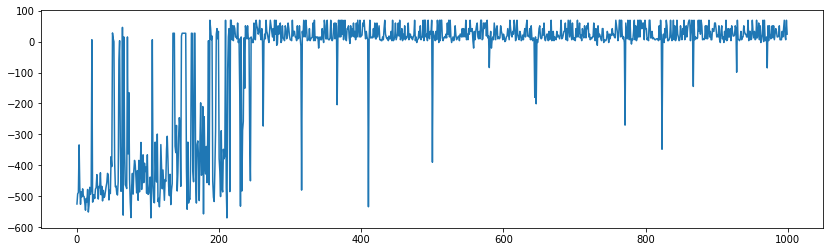

In [9]:
plt.rcParams["figure.figsize"] = (14,4)

fig, ax = plt.subplots()
ax.plot([num for num in range(NUM_EPISODES)], rewards_list)

plt.show()

In [10]:
for i, each in enumerate(inventory.agent.brain.q_table) :
    print('재고가 {}개 있을 때는 {}개를 주문'.format(100-i, np.argmax(each)))

재고가 100개 있을 때는 0개를 주문
재고가 99개 있을 때는 0개를 주문
재고가 98개 있을 때는 0개를 주문
재고가 97개 있을 때는 0개를 주문
재고가 96개 있을 때는 0개를 주문
재고가 95개 있을 때는 0개를 주문
재고가 94개 있을 때는 0개를 주문
재고가 93개 있을 때는 0개를 주문
재고가 92개 있을 때는 0개를 주문
재고가 91개 있을 때는 0개를 주문
재고가 90개 있을 때는 0개를 주문
재고가 89개 있을 때는 0개를 주문
재고가 88개 있을 때는 0개를 주문
재고가 87개 있을 때는 2개를 주문
재고가 86개 있을 때는 1개를 주문
재고가 85개 있을 때는 0개를 주문
재고가 84개 있을 때는 0개를 주문
재고가 83개 있을 때는 2개를 주문
재고가 82개 있을 때는 2개를 주문
재고가 81개 있을 때는 0개를 주문
재고가 80개 있을 때는 3개를 주문
재고가 79개 있을 때는 3개를 주문
재고가 78개 있을 때는 4개를 주문
재고가 77개 있을 때는 4개를 주문
재고가 76개 있을 때는 3개를 주문
재고가 75개 있을 때는 3개를 주문
재고가 74개 있을 때는 4개를 주문
재고가 73개 있을 때는 83개를 주문
재고가 72개 있을 때는 4개를 주문
재고가 71개 있을 때는 94개를 주문
재고가 70개 있을 때는 79개를 주문
재고가 69개 있을 때는 0개를 주문
재고가 68개 있을 때는 10개를 주문
재고가 67개 있을 때는 0개를 주문
재고가 66개 있을 때는 0개를 주문
재고가 65개 있을 때는 0개를 주문
재고가 64개 있을 때는 0개를 주문
재고가 63개 있을 때는 0개를 주문
재고가 62개 있을 때는 0개를 주문
재고가 61개 있을 때는 1개를 주문
재고가 60개 있을 때는 0개를 주문
재고가 59개 있을 때는 0개를 주문
재고가 58개 있을 때는 1개를 주문
재고가 57개 있을 때는 0개를 주문
재고가 56개 있을 때는 0개를 주문
재고가 55개 있을 때는 0개를 주문
재고가 54개 있을 때는 0개를 주문
재고가 53개 

In [11]:
inventory.agent.brain.q_table

array([[ 2327.67025996,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [ 2321.43258686,     0.        ,  1201.99720607, ...,
            0.        ,     0.        ,     0.        ],
       [ 2301.21372902,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [-1964.32519121, -2003.88444104, -1877.56997543, ...,
        -1966.01299966, -2007.83419861, -1990.21741829],
       [ -265.5       ,  -252.5       ,  -390.5825    , ...,
            0.        ,     0.        ,     0.        ],
       [ 1034.35548928,   657.39510789,   575.16903614, ...,
            0.        , -1221.01432893,     0.        ]])